<a href="https://colab.research.google.com/github/RioSatriatama/BMRI-Stock-Price/blob/main/Bank_Mandiri_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
!pip install yfinance
!pip install --upgrade mplfinance
import pandas as pd
import mplfinance as mpf
import yfinance as yf
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

     - 306.0 kB 4.7 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8438 sha256=5a919b4fde0bd5d0c2a642fa23b5c1837d81df5d5a41b2880928b266af31b554
  Stored in directory: /tmp/pip-ephem-wheel-cache-58qkxyir/wheels/f8/65/b0/57142851638a58e1cdc9eb1bd0f99c3e38b516db6b2c0cfe9b
Successfully built mpl-finance
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import datetime
import pytz
from dateutil.relativedelta import relativedelta
end = datetime.datetime.now(pytz.timezone('Asia/Jakarta'))
start = end - relativedelta(month=5)
print(end)
print(start)

2023-11-06 22:22:14.345046+07:00
2023-05-06 22:22:14.345046+07:00


In [ ]:
BMRI = yf.download("BMRI.JK", start, end)
BBCA = yf.download("BBCA.JK", start, end)
BBNI = yf.download("BBNI.JK", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(BMRI.head())

              Open    High     Low   Close  Adj Close     Volume
Date                                                            
2023-05-08  5175.0  5200.0  5125.0  5125.0     5125.0   64678000
2023-05-09  5100.0  5125.0  5050.0  5050.0     5050.0   93531000
2023-05-10  5050.0  5125.0  5050.0  5075.0     5075.0   58148200
2023-05-11  5075.0  5100.0  5025.0  5100.0     5100.0   63262300
2023-05-12  5075.0  5075.0  5000.0  5000.0     5000.0  105407300


In [ ]:
print(BMRI.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2023-05-08 to 2023-11-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       122 non-null    float64
 1   High       122 non-null    float64
 2   Low        122 non-null    float64
 3   Close      122 non-null    float64
 4   Adj Close  122 non-null    float64
 5   Volume     122 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 6.7 KB
None


<ipython-input-11-3d9a8f63d18d>:23: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  fig = mpf.plot(BMRI[start:end], **config)


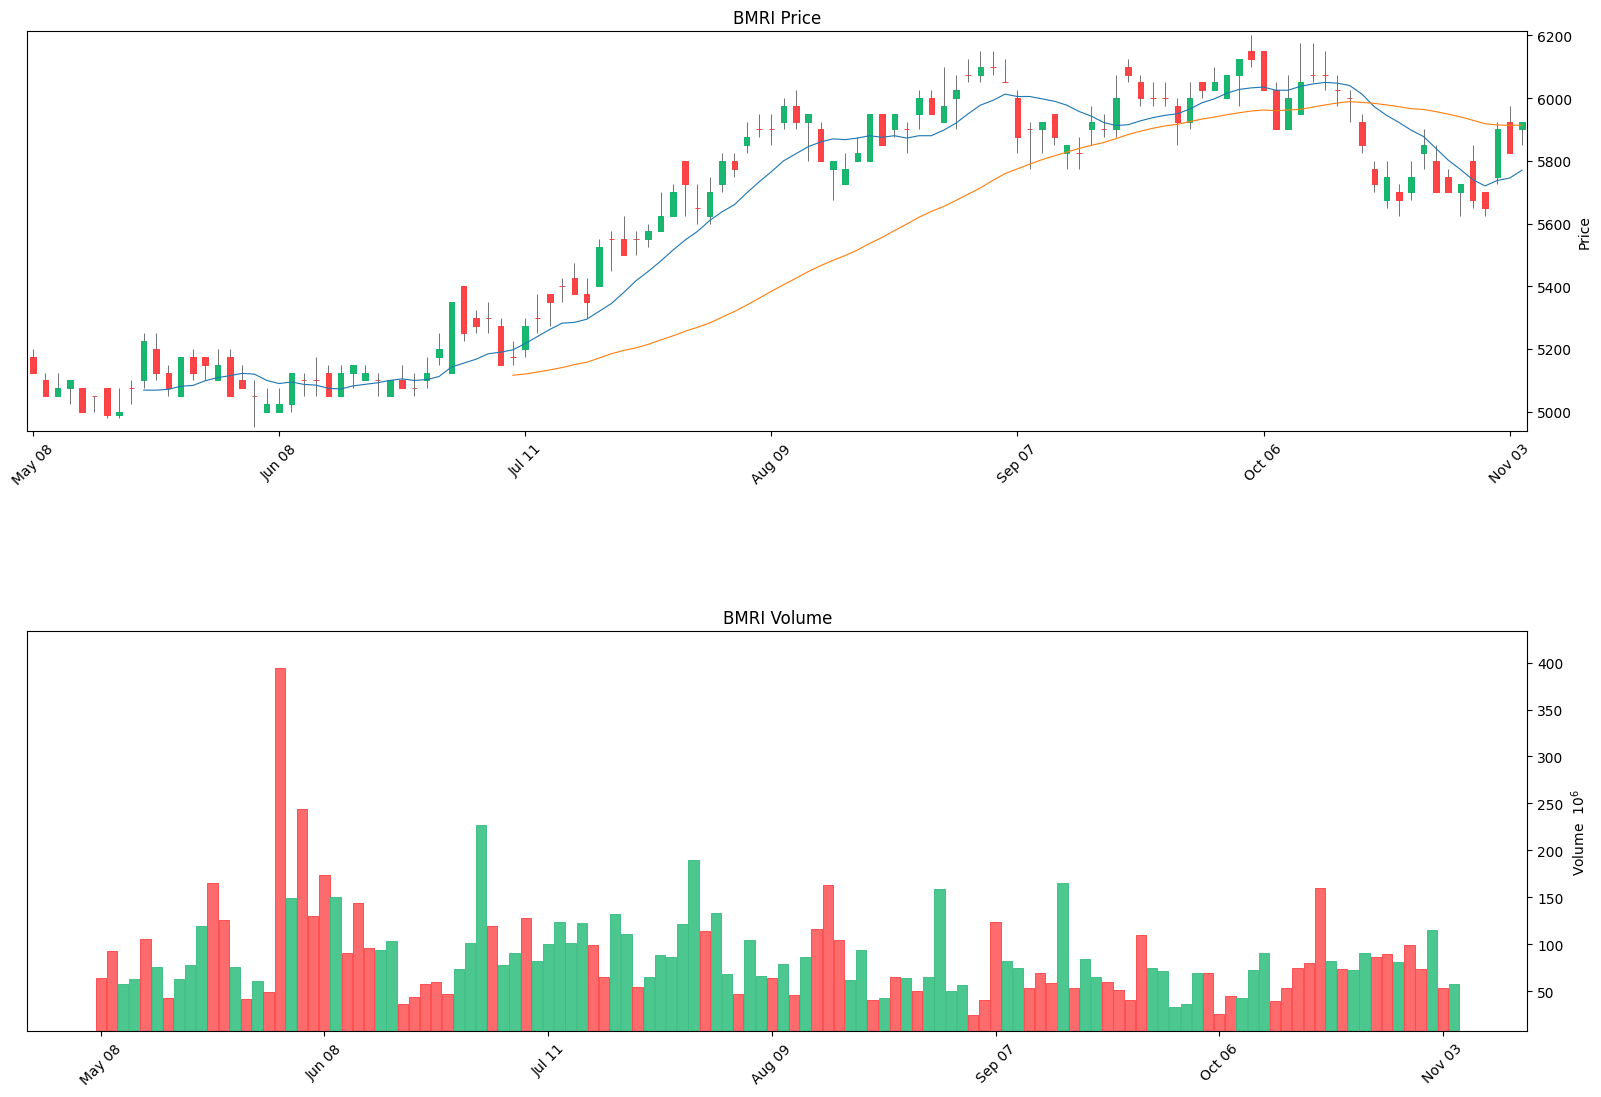

In [ ]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.axes([0,0,1,0.4])
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

ax2 = plt.axes([0,0.6,1,0.4])
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_right()


config = dict(
    style="yahoo",
    type="candle",
    mav=(10,40),
    volume=ax1,
    ax=ax2,
    num_panels=2,
    tight_layout=True
)

ax1.set_title("BMRI Volume")
ax2.set_title("BMRI Price")
fig = mpf.plot(BMRI[start:end], **config)

In [ ]:
df = pd.DataFrame({'BBCA': BBCA['Adj Close'], 'BBNI': BBNI['Adj Close'],
                   'BMRI': BMRI['Adj Close']})
df.head(2)

,BBCA,BBNI,BMRI
Date,,,
2023-05-08,9000.0,4575.0,5125.0
2023-05-09,8925.0,4562.5,5050.0


# **Plot the Dataframe**

Text(0, 0.5, 'Price')

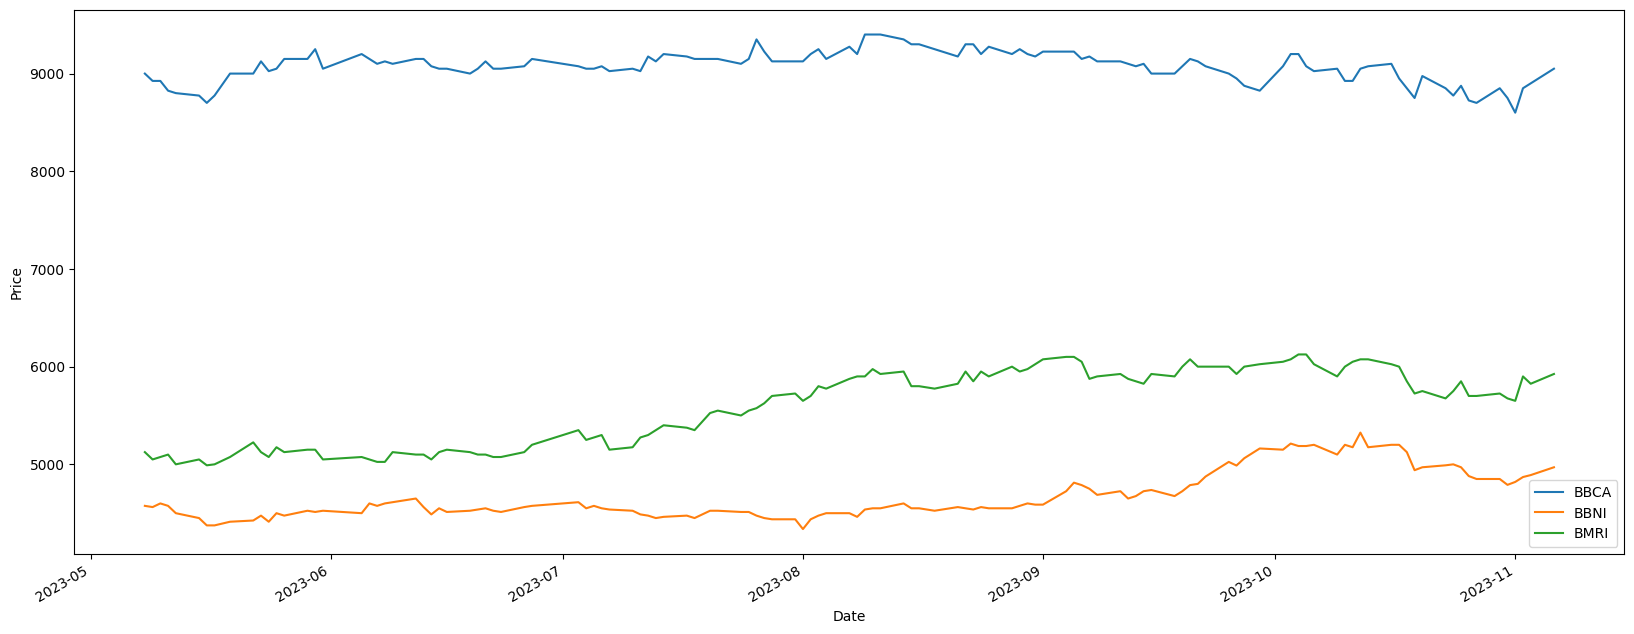

In [ ]:
df.plot(figsize=(20,8))
plt.ylabel('Price')

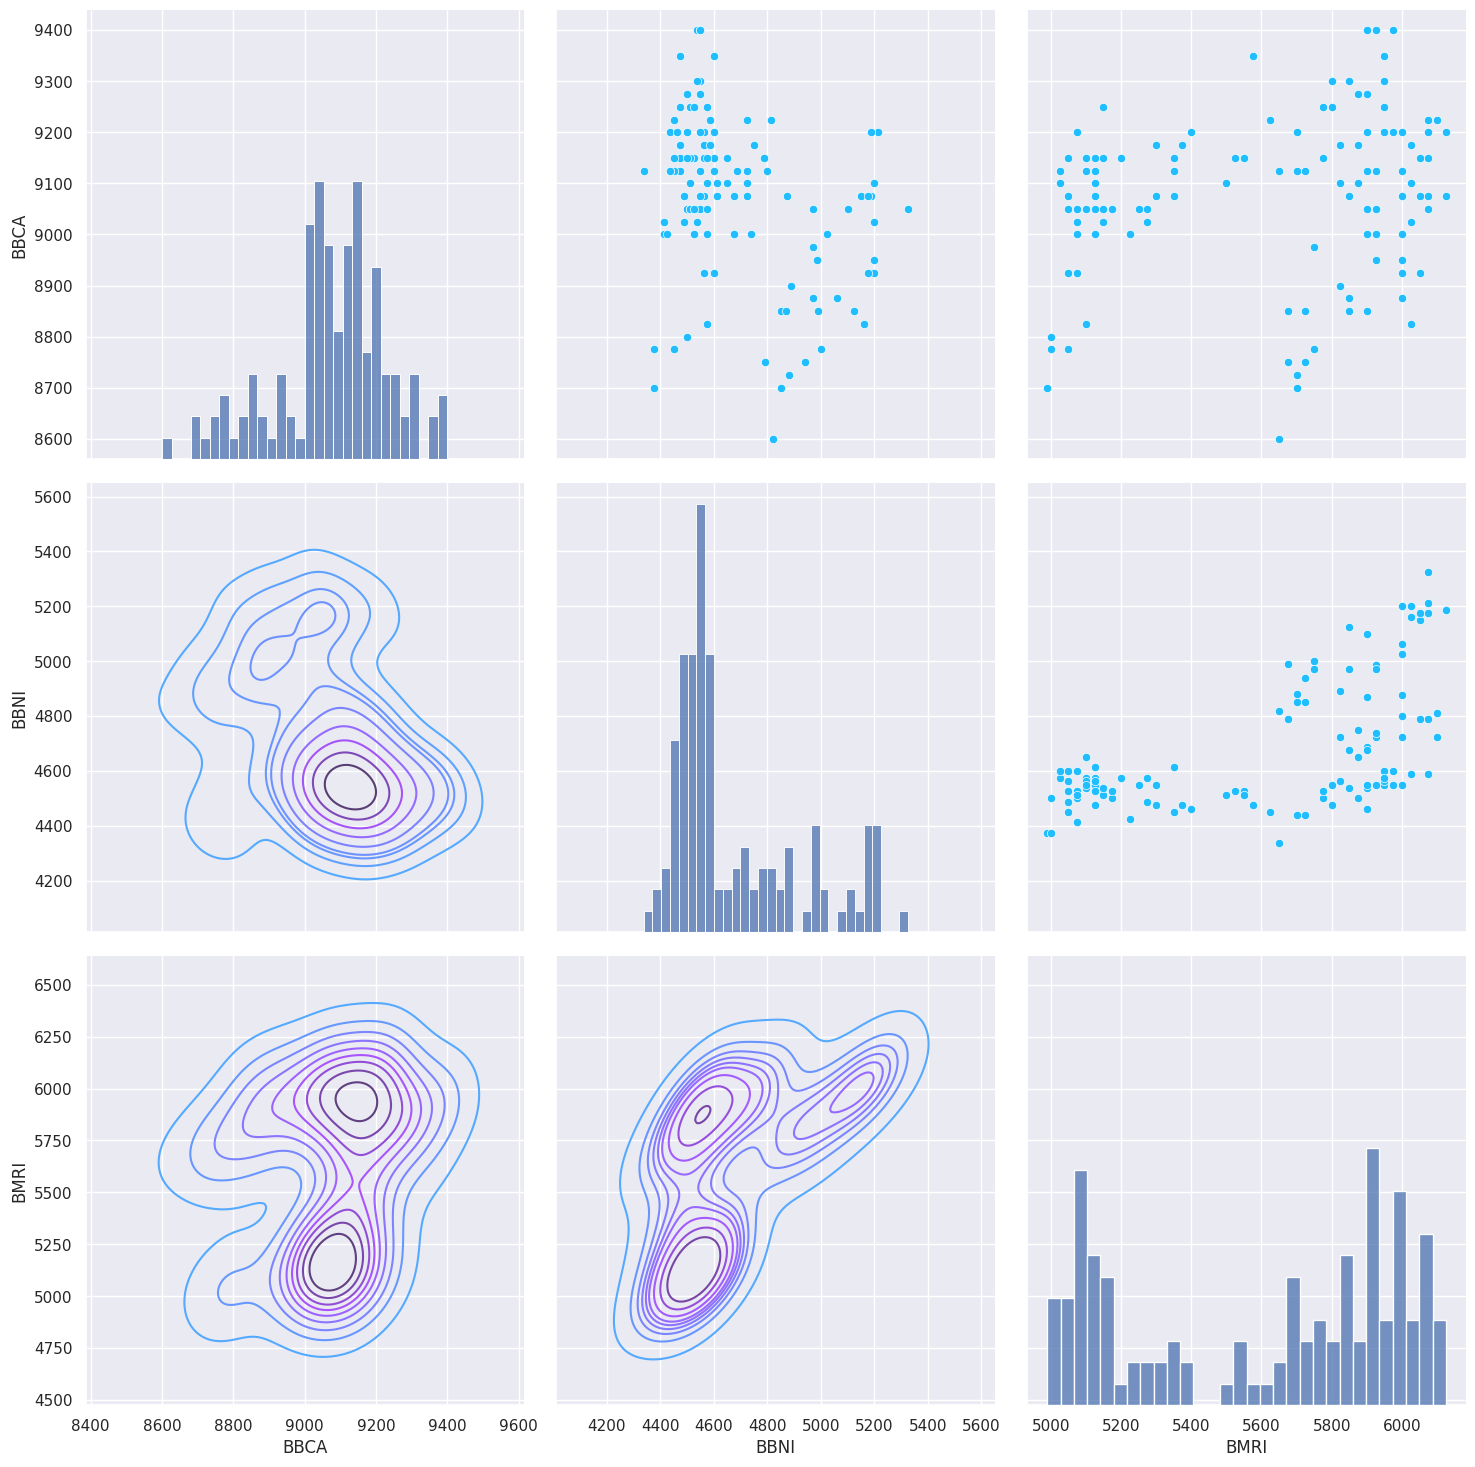

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.PairGrid(df, height=5)
fig.map_upper(sns.scatterplot, color='#20BEFF')
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(sns.histplot, bins=30)

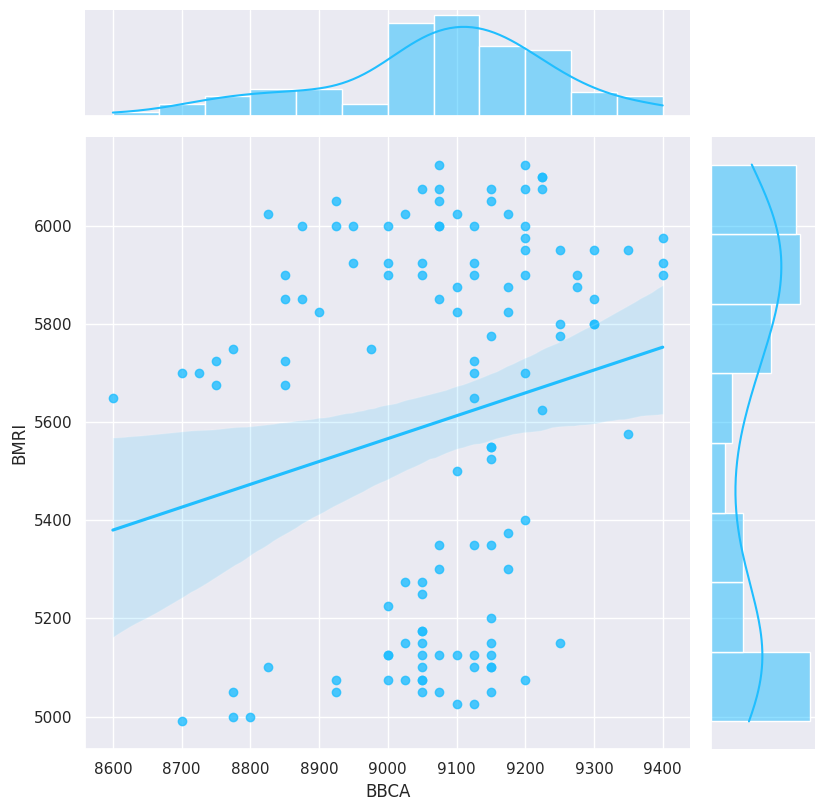

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.jointplot(x='BBCA', y='BMRI', data=df, kind='reg', height=8.27, color='#20BEFF')